In [371]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [372]:
!scp gpu6:bulatov/TXL/_git/test_res.csv ./test_res_lm_results.csv

test_res.csv                                  100%   53KB 743.1KB/s   00:00    


In [374]:
res_df = pd.read_csv('test_res_lm_results.csv')

In [375]:
# drop_masks = []
# drop_masks += [(res_df.num_mem_tokens == 50) & (res_df.mem_backprop_depth == 2)]
# drop_masks += [res_df['test loss'] < 0.1]
# drop_masks += [res_df['test ppl'] > 41]
# drop_masks += [(res_df.num_mem_tokens == 75) & (res_df.mem_backprop_depth == 1)]

# res_df = res_df[sum(drop_masks) == 0]

In [376]:
# res_df.seed

In [377]:
res_df.shape, res_df.drop_duplicates().shape

((134, 73), (126, 73))

In [378]:
# res_df = res_df[res_df.dataset =='wt103']
res_df['effective context'] = (res_df.mem_backprop_depth.fillna(0) + 1) * res_df.tgt_len
res_df['mem_backprop_depth'] = res_df['mem_backprop_depth'].fillna(0)
res_df = res_df.drop_duplicates()
res_df = res_df[res_df.mem_recursion_depth.isna()]

In [379]:
res_df.loc[res_df.mem_len > 0, ['effective context']] = res_df[res_df.mem_len > 0]['effective context'] + res_df[res_df.mem_len > 0].mem_len

In [380]:
enwik8 = res_df[res_df.dataset == 'enwik8']
res_df = res_df[res_df.dataset =='wt103']

In [381]:
mt = res_df[(res_df.mem_len == 0) & (res_df.num_mem_tokens != 0)].dropna(subset=['test ppl'])
xl = res_df[(res_df.mem_len > 0) & (res_df.num_mem_tokens == 0)].dropna(subset=['test ppl'])

mt_base = mt[mt.n_layer == 16]
mt_large = mt[mt.n_layer == 18]

xl_base = xl[xl.n_layer == 16]
xl_large = xl[xl.n_layer == 18]

In [382]:
target_cols = ['dataset', 'n_layer', 'scheduler', 'max_step', 'tgt_len', 'effective context',
        'mem_len', 'num_mem_tokens',
       'lr', 'patience', 'device_ids', 'mem_backprop_depth','test loss', 'test ppl']

In [383]:
import seaborn as sns

sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

## PPl (num mem tokens)

In [384]:
# df_ = mt_base
# context_sizes = np.unique(df_.tgt_len)
# bpds = np.unique(df_.mem_backprop_depth)

# fig, axs = plt.subplots(len(context_sizes), figsize=(10, 18))

# for i, context_size in enumerate(context_sizes):
#     axs[i].set_ylabel('ppl')
#     for j, bpd in enumerate(bpds):
#         df = df_[(df_.tgt_len == context_size) & (df_.mem_backprop_depth == bpd)].sort_values('num_mem_tokens')
#         axs[i].plot(df.num_mem_tokens, df['test ppl'])
#         axs[i].set_title(f'Wt-103, Memory Transformer, tgt {context_size}')
#     axs[i].legend([f'bpd-{b}' for b in bpds])
    

#     axs[i].set_xlabel('num mem')
# plt.show()

## ppl (effective context)

mt

In [385]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base#[mt_base.mem_backprop_depth > 0]
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens']).mean()['test ppl'].reset_index()

# plt.figure(figsize=(16, 8))
# plt.title('Wt-103: base. Memory transformer. Marker size ~ memory size')

# bpds = np.unique(df_.mem_backprop_depth)

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 5 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend([f'bpd-{int(b)}' for b in bpds])

# for i in range(len(bpds)):
#     lgnd.legendHandles[i]._sizes = [60]
# plt.show()

w trxl

In [386]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.figure(figsize=(16, 8))
# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_base
# xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 10, edgecolor='k', c='r')

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 10 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend(['Transformer-XL'] + [f'RMT bpd-{int(b)}' for b in bpds])
# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]


# for tgt_len in [50, 150]:
#     for m in np.unique(df_.num_mem_tokens):
#         slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#         plt.plot(slice['effective context'], slice['test ppl'], c=None)

#     slice = xl_[xl_.tgt_len == tgt_len]
#     plt.plot(slice['effective context'], slice['test ppl'], c='r')


# plt.show()

In [387]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens']).mean()['test ppl'].reset_index()
# plt.figure(figsize=(16, 8))
# # plt.title('Wt-103: base. Marker size ~ memory size')

# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_base
# xl_ = xl_.groupby(['effective context', 'mem_len']).mean()['test ppl'].reset_index()
# plt.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 10, edgecolor='k', c='r')

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 10 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend(['Transformer-XL'] + [f'RMT bpd-{int(b)}' for b in bpds])

# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]
# plt.show()

In [388]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base[mt_base.tgt_len == 50]
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.figure(figsize=(16, 8))
# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_base[xl_base.tgt_len == 50]
# xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 15, edgecolor='k', c='r')

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 15 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds])
# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]


# for tgt_len in [50]:
#     for m in np.unique(df_.num_mem_tokens):
#         slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#         plt.plot(slice['effective context'], slice['test ppl'], c=None, zorder=0)
#     # for x, y in zip(slice['effective context'], slice['test ppl']):
#         plt.annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.1, 0.2, 0.6))

#     slice = xl_[xl_.tgt_len == tgt_len]
#     plt.plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
#     # plt.annotate(slice.mem_len.values[-1], (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.2, 0.1, 0.1))
#     # print(slice.mem_len.values)
#     for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
#         plt.annotate(v, (x, y), size=15, c=(0.2, 0.1, 0.1))


# plt.show()

In [389]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base[mt_base.tgt_len == 150]
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.figure(figsize=(16, 8))
# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_base[xl_base.tgt_len == 150]
# xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
# plt.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 15, edgecolor='k', c='r')

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 15 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds])
# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]


# for tgt_len in [150]:
#     for m in np.unique(df_.num_mem_tokens):
#         slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#         plt.plot(slice['effective context'], slice['test ppl'], c=None, zorder=0)
#     # for x, y in zip(slice['effective context'], slice['test ppl']):
#         plt.annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.1, 0.2, 0.6))

#     slice = xl_[xl_.tgt_len == tgt_len]
#     plt.plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
#     # plt.annotate(slice.mem_len.values[-1], (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.2, 0.1, 0.1))
#     # print(slice.mem_len.values)
#     for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
#         plt.annotate(v, (x, y), size=15, c=(0.2, 0.1, 0.1))


# plt.show()

In [390]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# letter_arr = ['(a)', '(b)']
# for i, tgt_len in enumerate([50, 150]):
#     df_ = mt_base[mt_base.tgt_len == tgt_len]
#     xl_ = xl_base[xl_base.tgt_len == tgt_len]

#     df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
#     bpds = np.unique(df_.mem_backprop_depth)

#     xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
#     axs[i].scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 15, edgecolor='k', c='r')

#     for bpd in bpds:
#         slice = df_[df_.mem_backprop_depth == bpd]
#         axs[i].scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 15 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')

#     axs[i].set_xlabel(f'visible context while training\ncontext={tgt_len}')
#     axs[i].set_ylabel('ppl')
#     lgnd = axs[i].legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds])
#     for j in range(len(bpds) + 1):
#         lgnd.legendHandles[j]._sizes = [60]


#     for m in np.unique(df_.num_mem_tokens):
#         slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#         axs[i].plot(slice['effective context'], slice['test ppl'], c=None, zorder=0)
#     # for x, y in zip(slice['effective context'], slice['test ppl']):
#         axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.1, 0.2, 0.6))

#     slice = xl_[xl_.tgt_len == tgt_len]
#     axs[i].plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
#     # plt.annotate(slice.mem_len.values[-1], (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=15, c=(0.2, 0.1, 0.1))
#     # print(slice.mem_len.values)
#     for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
#         axs[i].annotate(v, (x, y), size=15, c=(0.2, 0.1, 0.1))


# plt.show()

In [391]:
# import seaborn as sns

# sns.set_theme(style='white', palette='Reds', font_scale=1.7, font='monospace')

# fontsize = 22
# legsize=20

# fig, axs = plt.subplots(2, 1, figsize=(12, 15))

# letter_arr = ['(a)', '(b)']
# for i, tgt_len in enumerate([50, 150]):
#     df_ = mt_base[mt_base.tgt_len == tgt_len]
#     xl_ = xl_base[xl_base.tgt_len == tgt_len]

#     df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
#     bpds = np.unique(df_.mem_backprop_depth)

#     xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
#     axs[i].scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 15, edgecolor='k', c='lightblue')

#     for bpd in bpds:
#         slice = df_[df_.mem_backprop_depth == bpd]
#         axs[i].scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 15 + 15, edgecolor='r', c=None if bpd > 0 else 'w')

#     axs[i].set_xlabel(f'visible context while training\ncontext={tgt_len}', size=fontsize)
#     axs[i].set_ylabel('ppl', size=fontsize)
#     lgnd = axs[i].legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds], fontsize=legsize)
#     for j in range(len(bpds) + 1):
#         lgnd.legendHandles[j]._sizes = [80]


#     for m in np.unique(df_.num_mem_tokens):
#         slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#         axs[i].plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
#     # for x, y in zip(slice['effective context'], slice['test ppl']):
#         # axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.1, 0.2, 0.6))
#         axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.6, 0.2, 0.2))

#     slice = xl_[xl_.tgt_len == tgt_len]
#     axs[i].plot(slice['effective context'], slice['test ppl'], c='c', zorder=0)
#     for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
#         # axs[i].annotate(v, (x, y), size=22, c=(0.2, 0.1, 0.1))
#         axs[i].annotate(v, (x, y), size=22, c=(0.1, 0.1, 0.2))

#     axs[i].grid()
#     # plt.yticks(fontsize=20)

# plt.tight_layout()
# plt.savefig('../../Memory transformer/_figures_paper/effective_context_v.png', format='png')
# plt.show()

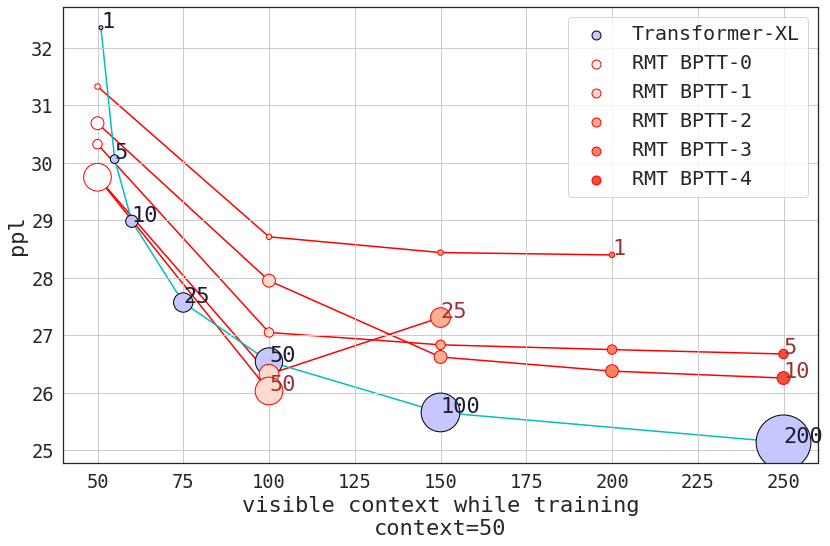

In [393]:
import seaborn as sns

sns.set_theme(style='white', palette='Reds', font_scale=1.7, font='monospace')

fontsize = 22
legsize=20

fig, axs = plt.subplots(1, figsize=(12, 8))

for i, tgt_len in enumerate([50]):
    df_ = mt_base[mt_base.tgt_len == tgt_len]
    xl_ = xl_base[xl_base.tgt_len == tgt_len]

    df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens', 'tgt_len']).mean()['test ppl'].reset_index()
    bpds = np.unique(df_.mem_backprop_depth)

    xl_ = xl_.groupby(['effective context', 'mem_len', 'tgt_len']).mean()['test ppl'].reset_index()
    axs.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 15, edgecolor='k', color=(0.78, 0.78, 1))

    for bpd in bpds:
        slice = df_[df_.mem_backprop_depth == bpd]
        axs.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 15 + 15, edgecolor='r', c=None if bpd > 0 else 'w')

    axs.set_xlabel(f'visible context while training\ncontext={tgt_len}', size=fontsize)
    axs.set_ylabel('ppl', size=fontsize)
    lgnd = axs.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds], fontsize=legsize)
    for j in range(len(bpds) + 1):
        lgnd.legendHandles[j]._sizes = [80]


    for m in np.unique(df_.num_mem_tokens):
        slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
        axs.plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
    # for x, y in zip(slice['effective context'], slice['test ppl']):
        # axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.1, 0.2, 0.6))
        axs.annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, color=(0.6, 0.2, 0.2))

    slice = xl_[xl_.tgt_len == tgt_len]
    axs.plot(slice['effective context'], slice['test ppl'], c='c', zorder=0)
    for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
        # axs[i].annotate(v, (x, y), size=22, c=(0.2, 0.1, 0.1))
        axs.annotate(v, (x, y), size=22, c=(0.1, 0.1, 0.2))

    axs.grid()
    # plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('../../Memory transformer/_figures_paper/effective_context_50.png', format='png')
plt.show()

In [394]:
# xl_ = enwik8[(enwik8.tgt_len == tgt_len) & (enwik8.mem_len > 0)]
# xl_

In [395]:
# import seaborn as sns

# sns.set_theme(style='white', palette='Reds', font_scale=1.7, font='monospace')

# fontsize = 22
# legsize=20

# fig, axs = plt.subplots(1, figsize=(12, 8))

# tgt_len = 128

# enwik8['mem_size'] = enwik8.num_mem_tokens + enwik8.mem_len
# df_ = enwik8[(enwik8.tgt_len == tgt_len) & (enwik8.num_mem_tokens > 0)]
# xl_ = enwik8[(enwik8.tgt_len == tgt_len) & (enwik8.mem_len > 0)]

# df_ = df_.groupby(['mem_backprop_depth', 'mem_size', 'tgt_len']).mean()['test bpc'].reset_index()
# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_.groupby(['mem_size', 'tgt_len']).mean()['test bpc'].reset_index()
# axs.scatter(xl_['mem_size'], xl_['test bpc'], s=120, edgecolor='k', c=(0.78, 0.78, 1))

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     # axs.scatter(slice['mem_size'], slice['test bpc'], s=slice.mem_size * 15 + 15, edgecolor='r', c=None if bpd > 0 else 'w')
#     axs.scatter(slice['mem_size'], slice['test bpc'], s=120, edgecolor='r', c=None if bpd > 0 else 'w')

# axs.set_xlabel('memory size', size=fontsize)
# axs.set_ylabel('bpc', size=fontsize)
# lgnd = axs.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds], fontsize=legsize)
# # for j in range(len(bpds) + 1):
# #     lgnd.legendHandles[j]._sizes = [80]


# # for m in np.unique(df_.num_mem_tokens):
# #     slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
# #     axs.plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
# # # for x, y in zip(slice['effective context'], slice['test ppl']):
# #     # axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.1, 0.2, 0.6))
# #     axs.annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.6, 0.2, 0.2))

# # slice = xl_[xl_.tgt_len == tgt_len]
# # axs.plot(slice['effective context'], slice['test ppl'], c='c', zorder=0)
# # for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
# #     # axs[i].annotate(v, (x, y), size=22, c=(0.2, 0.1, 0.1))
# #     axs.annotate(v, (x, y), size=22, c=(0.1, 0.1, 0.2))
# axs.set_title('enwik8 context=128')
# axs.grid()
# # plt.savefig('../../Memory transformer/_figures_paper/effective_context_128.png', format='png')
# plt.show()

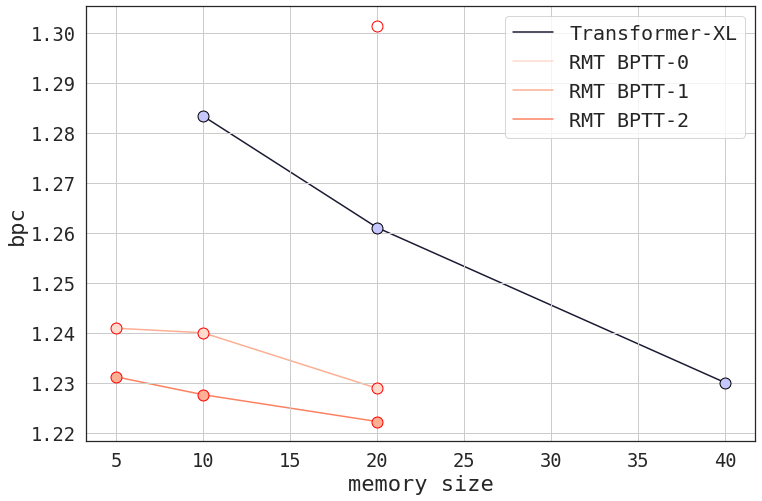

In [399]:
import seaborn as sns

sns.set_theme(style='white', palette='Reds', font_scale=1.7, font='monospace')

fontsize = 22
legsize=20

fig, axs = plt.subplots(1, figsize=(12, 8))

tgt_len = 128

enwik8['mem_size'] = enwik8.num_mem_tokens + enwik8.mem_len
df_ = enwik8[(enwik8.tgt_len == tgt_len) & (enwik8.num_mem_tokens > 0) & (enwik8.mem_size != 30)]
xl_ = enwik8[(enwik8.tgt_len == tgt_len) & (enwik8.mem_len > 0) & (enwik8.mem_size != 30)]
xl_ = xl_[xl_.mem_size < 50]

df_ = df_.groupby(['mem_backprop_depth', 'mem_size', 'tgt_len']).mean()['test bpc'].reset_index()
bpds = np.unique(df_.mem_backprop_depth)

xl_ = xl_.groupby(['mem_size', 'tgt_len']).mean()['test bpc'].reset_index()
axs.scatter(xl_['mem_size'], xl_['test bpc'], s=120, edgecolor='k', color=(0.78, 0.78, 1))
axs.plot(xl_.mem_size, xl_['test bpc'], c=(0.1, 0.1, 0.2), zorder=-1)

for bpd in bpds:
    slice = df_[df_.mem_backprop_depth == bpd].sort_values('mem_size')
    axs.plot(slice.mem_size, slice['test bpc'], zorder=-1)
    # axs.scatter(slice['mem_size'], slice['test bpc'], s=slice.mem_size * 15 + 15, edgecolor='r', c=None if bpd > 0 else 'w')
    axs.scatter(slice['mem_size'], slice['test bpc'], s=120, edgecolor='r', c=None if bpd > 0 else 'w')


for bpd in bpds:
    slice = df_[df_.mem_backprop_depth == bpd]


axs.set_xlabel('memory size', size=fontsize)
axs.set_ylabel('bpc', size=fontsize)
lgnd = axs.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds], fontsize=legsize)
# for j in range(len(bpds) + 1):
#     lgnd.legendHandles[j]._sizes = [80]


# for m in np.unique(df_.num_mem_tokens):
#     slice = df_[(df_.num_mem_tokens == m) & (df_.tgt_len == tgt_len)].sort_values('effective context')
#     axs.plot(slice['effective context'], slice['test ppl'], c='r', zorder=0)
# # for x, y in zip(slice['effective context'], slice['test ppl']):
#     # axs[i].annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.1, 0.2, 0.6))
#     axs.annotate(m, (slice['effective context'].values[-1], slice['test ppl'].values[-1]), size=22, c=(0.6, 0.2, 0.2))

# slice = xl_[xl_.tgt_len == tgt_len]
# axs.plot(slice['effective context'], slice['test ppl'], c='c', zorder=0)
# for v, x, y in zip(slice.mem_len, slice['effective context'], slice['test ppl']):
#     # axs[i].annotate(v, (x, y), size=22, c=(0.2, 0.1, 0.1))
#     axs.annotate(v, (x, y), size=22, c=(0.1, 0.1, 0.2))
# axs.set_title('enwik8 context=128')
axs.grid()
plt.savefig('../../Memory transformer/_figures_paper/mem_size_enwik_scatter.png', format='png')
plt.show()

In [312]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base[mt_base.tgt_len == 150]
# df_ = df_.groupby(['mem_backprop_depth', 'effective context', 'num_mem_tokens']).mean()['test ppl'].reset_index()
# plt.figure(figsize=(16, 8))
# # plt.title('Wt-103: base. Marker size ~ memory size')

# bpds = np.unique(df_.mem_backprop_depth)

# xl_ = xl_base[xl_base.tgt_len == 150]
# xl_ = xl_.groupby(['effective context', 'mem_len']).mean()['test ppl'].reset_index()
# plt.scatter(xl_['effective context'], xl_['test ppl'], s=xl_['mem_len'] * 10, edgecolor='k', c='r')

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]
#     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 10 + 15, edgecolor='grey', c=None if bpd > 0 else 'w')


# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend(['Transformer-XL'] + [f'RMT BPTT-{int(b)}' for b in bpds])

# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]
# plt.show()

solo trxl

In [124]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base
# plt.figure(figsize=(16, 8))
# plt.title('Wt-103: base. Memory transformer. Marker size ~ memory size')

# bpds = np.unique(df_.mem_backprop_depth)

# # for bpd in bpds:
# #     slice = df_[df_.mem_backprop_depth == bpd]
# #     plt.scatter(slice['effective context'], slice['test ppl'], s=slice.num_mem_tokens * 5 + 15, edgecolor='grey')

# plt.scatter(xl_base['effective context'], xl_base['test ppl'], s=xl_base['mem_len']*5, edgecolor='k', c='r')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# # lgnd = plt.legend([f'bpd-{int(b)}' for b in bpds] + ['XL'])

# # for i in range(len(bpds) + 1):
# #     lgnd.legendHandles[i]._sizes = [60]
# plt.show()

In [25]:
# import seaborn as sns

# sns.set_theme(style='white', palette='BuPu', font_scale=1.3, font='monospace')

# df_ = mt_base
# plt.figure(figsize=(16, 8))
# plt.title('Wt-103: base. Marker size ~ memory size')

# bpds = np.unique(df_.mem_backprop_depth)

# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd].sort_values('effective context')
#     plt.plot(slice['effective context'], slice['test ppl'])#, s=slice.num_mem_tokens * 5 + 15, edgecolor='grey')

# xlb = xl_base.sort_values('effective context')
# plt.plot(xlb['effective context'], xlb['test ppl'], c='r')# s=xlb['mem_len'] * 5, edgecolor='k')

# plt.xlabel('visible context while training')
# plt.ylabel('ppl')
# lgnd = plt.legend([f'bpd-{int(b)}' for b in bpds] + ['Transformer-XL'])

# for i in range(len(bpds) + 1):
#     lgnd.legendHandles[i]._sizes = [60]
# plt.show()

### bpd improvement with various mem size

In [122]:
# df_ = mt_base[(mt_base.mem_backprop_depth > 0)]
# df_ = mt_base[mt_base.num_mem_tokens != 50]
# plt.figure(figsize=(16, 8))
# plt.title('Wt-103: base. Memory transformer')

# num_mems = np.unique(df_.num_mem_tokens)
# for num_mem in num_mems:
#     slice = df_[df_.num_mem_tokens == num_mem].sort_values('effective context')
#     # plt.plot(slice['effective context'], slice['test ppl'])
#     slice.groupby('effective context').mean()['test ppl'].plot()

# plt.xlabel('effective context size')
# plt.ylabel('ppl')
# plt.legend([f'{m} mem' for m in num_mems])
# plt.show()


In [157]:
# fontdict = {'fontsize': 18, 'font':'monospace'}

# df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
# df['mem_size'] = df.mem_len + df.num_mem_tokens

# mem_lens = np.unique(df.mem_size)
# plot_df = pd.DataFrame(index = mem_lens)


# # STD
# plot_df = pd.DataFrame(index = mem_lens)
# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

# std_df = plot_df.reset_index().iloc[:-2]

# # Mean

# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

# ax = plot_df.reset_index().iloc[:-2].plot(x='index', kind='bar', figsize=(12, 8), cmap='BuPu', edgecolor='grey', width=0.8, yerr=std_df)


# # plt.title('WT103: base')
# plt.legend(['Transformer-XL', 'RMT', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=15)
# plt.xlabel('memory size', fontsize=18)
# plt.ylabel('test ppl', fontsize=18)
# plt.xticks(rotation=0)
# plt.ylim(21, 40)
# plt.show()

In [218]:
# import seaborn as sns

# sns.set_theme(style='white', palette='PuBu', font_scale=1.3, font='monospace')
# fontsize=28
# legsize=22

# df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
# df['mem_size'] = df.mem_len + df.num_mem_tokens

# mem_lens = np.unique(df.mem_size)
# plot_df = pd.DataFrame(index = mem_lens)

# fontdict = {'fontsize': 18, 'font':'courier'}
# width = 0.8


# # STD
# plot_df = pd.DataFrame(index = mem_lens)
# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

# std_df = plot_df.reset_index().iloc[:-2]

# # Mean
# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

# plot_df = plot_df.reset_index().iloc[:-2]

# width = 0.2
# x = np.arange(plot_df.shape[0])

# col_pos = np.arange(len(plot_df.columns[1:]))
# biases = (col_pos - np.mean(col_pos)) * width


# fig, ax = plt.subplots(figsize=(12, 8))
# rects = []
# for i, col in enumerate(plot_df.columns[1:]):
#     if i == 0:
#         color=(0.84, 0.3, 0.3)
#     else:
#         color = None
#     rect = ax.bar(x + biases[i], plot_df[col], width, edgecolor='k', color=color, yerr=std_df[col], capsize=4)
#     rects.append(rect)

# plt.legend(['Transformer-XL', 'RMT', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=legsize, loc='upper right')

# plt.xlabel('memory size', fontsize=fontsize)
# plt.ylabel('test ppl', fontsize=fontsize)
# plt.xticks(rotation=0)
# plt.ylim(21, 40)
# plt.savefig('../../Memory transformer/_figures_paper/mem_size.png', format='png')
# plt.show()

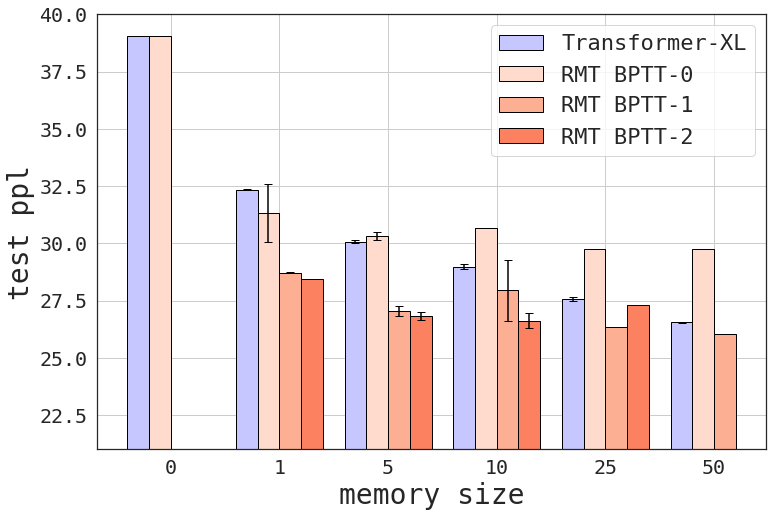

In [401]:
import seaborn as sns

sns.set_theme(style='white', palette='Reds', font_scale=1.3, font='monospace')
fontsize=28
legsize=22

df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
df['mem_size'] = df.mem_len + df.num_mem_tokens

mem_lens = np.unique(df.mem_size)
plot_df = pd.DataFrame(index = mem_lens)

fontdict = {'fontsize': 18, 'font':'courier'}
width = 0.8


# STD
plot_df = pd.DataFrame(index = mem_lens)
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

std_df = plot_df.reset_index().iloc[:-2]

# Mean
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

plot_df = plot_df.reset_index().iloc[:-2]

width = 0.2
x = np.arange(plot_df.shape[0])

col_pos = np.arange(len(plot_df.columns[1:]))
biases = (col_pos - np.mean(col_pos)) * width


fig, ax = plt.subplots(figsize=(12, 8))
rects = []
for i, col in enumerate(plot_df.columns[1:]):
    if i == 0:
        color=(0.78, 0.78, 1)
        # color = 'lightblue'
    else:
        color = None
    rect = ax.bar(x + biases[i], plot_df[col], width, edgecolor='k', color=color, yerr=std_df[col], capsize=4)
    rects.append(rect)

plt.legend(['Transformer-XL', 'RMT BPTT-0', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=legsize, loc='upper right')

plt.xlabel('memory size', fontsize=fontsize)
plt.ylabel('test ppl', fontsize=fontsize)
plt.xticks(ticks = np.arange(len(plot_df.index)), rotation=0, labels=plot_df['index'], fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(21, 40)
plt.grid()
plt.savefig('../../Memory transformer/_figures_paper/mem_size.png', format='png')
plt.show()

In [405]:
[1] * (mem_lens-1)

array([ -1,   0,   4,   9,  24,  49,  99, 199])

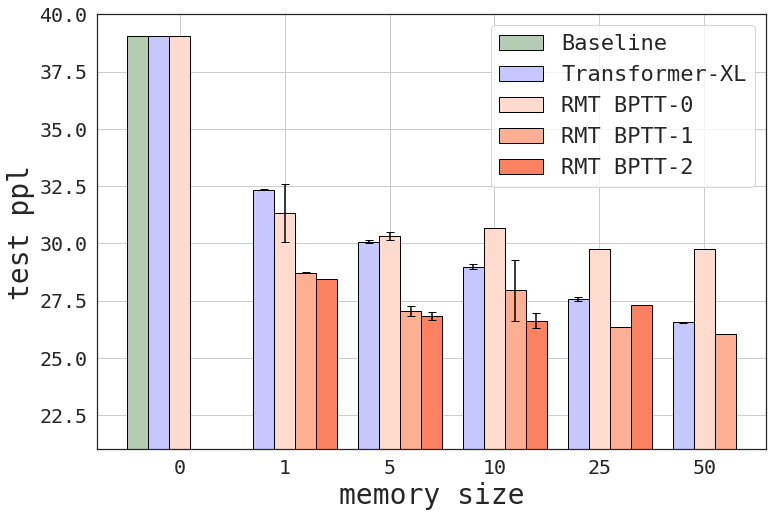

In [410]:
import seaborn as sns

sns.set_theme(style='white', palette='Reds', font_scale=1.3, font='monospace')
fontsize=28
legsize=22

df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
df['mem_size'] = df.mem_len + df.num_mem_tokens

mem_lens = np.unique(df.mem_size)
plot_df = pd.DataFrame(index = mem_lens)

fontdict = {'fontsize': 18, 'font':'courier'}
width = 0.8


# STD
plot_df = pd.DataFrame(index = mem_lens)
plot_df['Baseline'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == 0)]['test ppl'].std()]  + [None] * len(mem_lens[:-1])
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

std_df = plot_df.reset_index().iloc[:-2]

# Mean
# plot_df['Baseline'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == 0)]['test ppl'].std()] 
plot_df['Baseline'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == 0)]['test ppl'].mean()]  + [None] * len(mem_lens[:-1])
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

plot_df = plot_df.reset_index().iloc[:-2]

width = 0.2
x = np.arange(plot_df.shape[0])

col_pos = np.arange(len(plot_df.columns[1:]))
biases = (col_pos - np.mean(col_pos)) * width


fig, ax = plt.subplots(figsize=(12, 8))
rects = []
for i, col in enumerate(plot_df.columns[1:]):
    if i == 1:
        color=(0.78, 0.78, 1)
        # color = 'lightblue'
    elif i == 0:
        color=(0.7, 0.8, 0.7)
    else:
        color = None
    rect = ax.bar(x + biases[i], plot_df[col], width, edgecolor='k', color=color, yerr=std_df[col], capsize=4)
    rects.append(rect)

plt.legend(['Baseline', 'Transformer-XL', 'RMT BPTT-0', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=legsize, loc='upper right')

plt.xlabel('memory size', fontsize=fontsize)
plt.ylabel('test ppl', fontsize=fontsize)
plt.xticks(ticks = np.arange(len(plot_df.index)), rotation=0, labels=plot_df['index'], fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(21, 40)
plt.grid()
plt.savefig('../../Memory transformer/_figures_paper/mem_size.png', format='png')
plt.show()

In [92]:
biases

array([-1.5, -0.5,  0.5,  1.5])

In [120]:

# plot_df.plot(x='index', kind='bar', figsize=(12, 8), cmap='BuPu', edgecolor='grey', width=width)
# mean_df = plot_df

# # STD
# plot_df = pd.DataFrame(index = mem_lens)
# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

# plot_df = plot_df.reset_index().iloc[:-2]

# # plt.title('WT103: base')
# plt.legend(['Transformer-XL', 'RMT', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=15)



# plt.xlabel('memory size', fontsize=16)
# plt.ylabel('test ppl', fontsize=16)
# plt.xticks(rotation=0)
# plt.ylim(21, 40)
# plt.show()

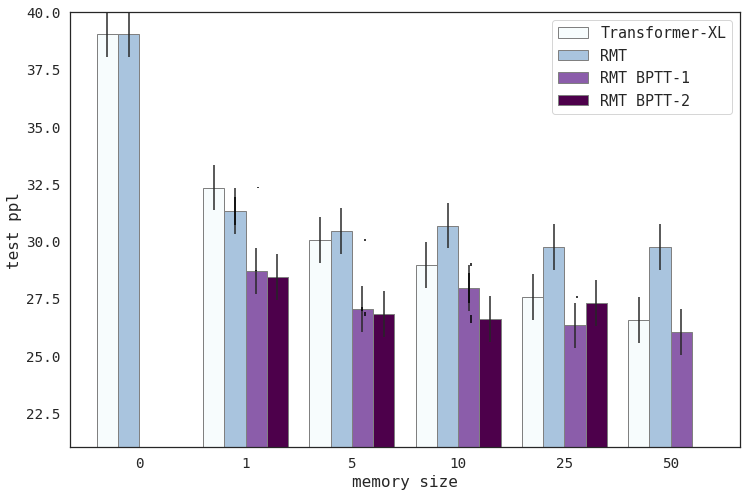

In [142]:
fontdict = {'fontsize': 18, 'font':'monospace'}
width = 0.8

df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
df['mem_size'] = df.mem_len + df.num_mem_tokens

mem_lens = np.unique(df.mem_size)
plot_df = pd.DataFrame(index = mem_lens)

# Mean
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

plot_df = plot_df.reset_index().iloc[:-2]
plot_df.plot(x='index', kind='bar', figsize=(12, 8), cmap='BuPu', edgecolor='grey', width=width, yerr=1)
mean_df = plot_df

col2b = dict(zip(plot_df.columns[1:], [0.12, -0.1, 0.1, 0.12]))

# STD
plot_df = pd.DataFrame(index = mem_lens)
plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].std() for i in mem_lens]
plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].std() for i in mem_lens]

plot_df = plot_df.reset_index().iloc[:-2]

# plt.title('WT103: base')
plt.legend(['Transformer-XL', 'RMT', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=15)

for i, row in plot_df.iterrows():
    for col in plot_df.columns[1:]:
        if pd.isna(row[col]):
            continue
        # print(i, )
        std = row[col]
        # print(col2b[col])
        # print(mean_df.loc[i, col])
        plt.vlines(i + col2b[col], mean_df.loc[i, col] - std/2, mean_df.loc[i, col] + std/2, color='k')

plt.xlabel('memory size', fontsize=16)
plt.ylabel('test ppl', fontsize=16)
plt.xticks(rotation=0)
plt.ylim(21, 40)
plt.show()

In [87]:
# fontdict = {'fontsize': 18, 'font':'monospace'}

# df = res_df[(res_df.n_layer == 16) & (res_df.tgt_len == 50)]
# df['mem_size'] = df.mem_len + df.num_mem_tokens

# mem_lens = np.unique(df.mem_size)
# plot_df = pd.DataFrame(index = mem_lens)

# plot_df['ppl_XL'] = [df[(df.num_mem_tokens == 0) & (df.mem_len == i)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-0'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 0)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-1'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 1)]['test ppl'].mean() for i in mem_lens]
# plot_df['ppl_MT_bpd-2'] = [df[(df.num_mem_tokens == i) & (df.mem_len == 0) & (df.mem_backprop_depth == 2)]['test ppl'].mean() for i in mem_lens]

# ax = plot_df.reset_index().iloc[:-2].plot(x='index', kind='bar', figsize=(12, 8), cmap='BuPu', edgecolor='grey', width=0.8)


# for p in ax.patches:
#     x = p.get_x()  # get the bottom left x corner of the bar
#     w = p.get_width()  # get width of bar
#     h = p.get_height()  # get height of bar
#     min_y = z[h]['min']  # use h to get min from dict z
#     max_y = z[h]['max']  # use h to get max from dict z
#     plt.vlines(x+w/2, min_y, max_y, color='k')  # draw a vertical line

# # plt.title('WT103: base')
# plt.legend(['Transformer-XL', 'RMT', 'RMT BPTT-1', 'RMT BPTT-2'], fontsize=15)
# plt.xlabel('memory size', fontsize=16)
# plt.ylabel('test ppl', fontsize=16)
# plt.xticks(rotation=0)
# plt.ylim(21, 40)
# plt.show()

,ppl_XL,ppl_MT_bpd-0,ppl_MT_bpd-1,ppl_MT_bpd-2
0,39.042,39.042,NaN,NaN
1,NaN,NaN,28.693,28.438
5,30.111,30.453,27.191,26.707
10,29.060,30.687,28.884,26.380
25,27.631,29.751,26.322,27.308
50,26.550,29.748,26.030,NaN
100,25.654,NaN,NaN,NaN
200,25.136,NaN,NaN,NaN


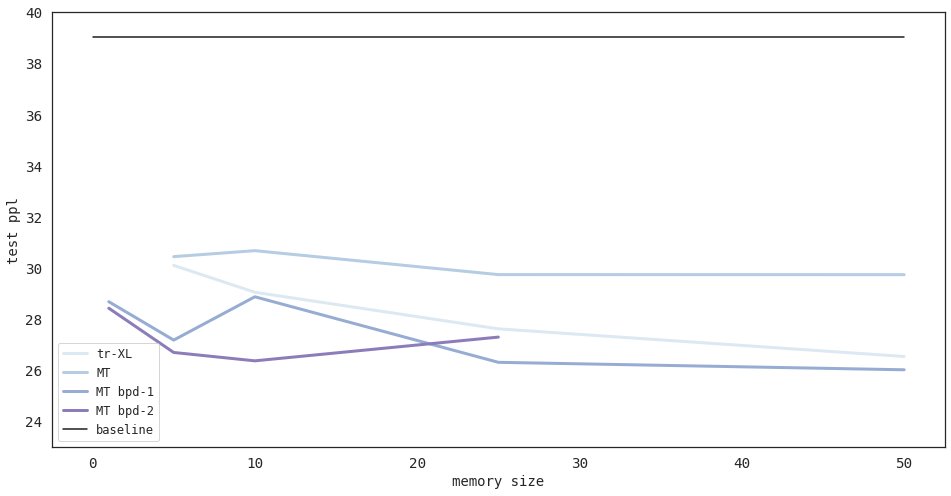

In [233]:
fontdict = {'fontsize': 14}
plot_df.reset_index().iloc[:-2].plot(x='index', figsize=(16, 8), linewidth=3)
plt.plot(plot_df.index[:-2], plot_df.ppl_XL[0] * np.ones_like(plot_df.index[:-2]), c='k')
plt.legend([ 'tr-XL', 'MT', 'MT bpd-1', 'MT bpd-2', 'baseline',], fontsize=12)
plt.xlabel('memory size', fontdict=fontdict)
plt.ylabel('test ppl', fontdict=fontdict)
plt.ylim(23, 40)
# plt.ylim(20, 40)
plt.show()

In [45]:
plot_df.dropna(subset=['ppl_XL, ppl_MT_bpd-0']).fillna(0)

KeyError: ['ppl_XL, ppl_MT_bpd-0']

<AxesSubplot:xlabel='mem_size'>

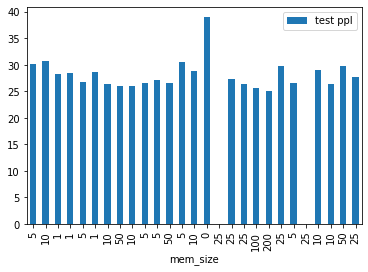

In [23]:
df.plot(x='mem_size', y=['test ppl'], kind='bar')

In [24]:
gb = df[df.num_mem_tokens > 0].groupby(['mem_size', 'mem_backprop_depth']).mean()['test ppl']

In [26]:
gb.reset_index()

,mem_size,mem_backprop_depth,test ppl
0,1,1.0,28.693
1,1,2.0,28.438
2,1,3.0,28.374
3,5,0.0,30.453
4,5,1.0,27.191
5,5,2.0,26.707
6,5,3.0,26.565
7,5,4.0,26.662
8,10,0.0,30.687
9,10,1.0,28.884


In [ ]:
df_ = mt_base[mt_base.num_mem_tokens != 50]
plt.figure(figsize=(16, 8))
plt.title('Wt-103. Memory Transformer - base')

num_mems = np.unique(df_.num_mem_tokens)
for num_mem in num_mems:
    slice = df_[df_.num_mem_tokens == num_mem].sort_values('effective context')
    # plt.plot(slice['effective context'], slice['test ppl'])
    slice.groupby('effective context').mean()['test ppl'].plot()

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.legend([f'{m} mem' for m in num_mems])
plt.show()

## tests

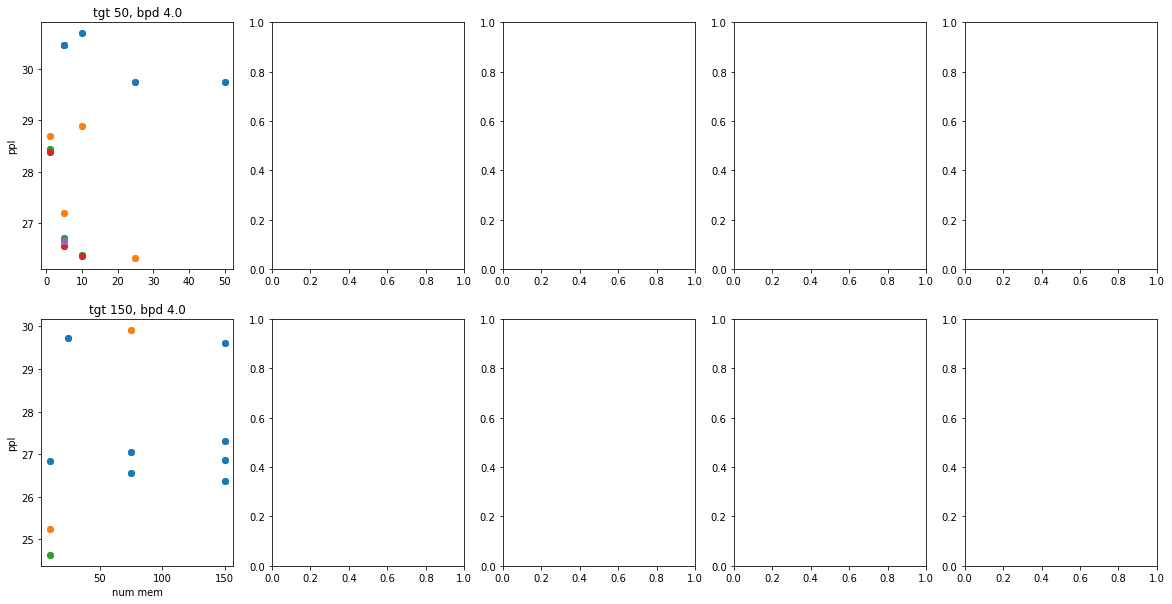

In [72]:

# df_ = mt_base
# context_sizes = np.unique(df_.tgt_len)
# bpds = np.unique(df_.mem_backprop_depth)

# fig, axs = plt.subplots(len(context_sizes), len(bpds), figsize=(20, 10))

# for i, context_size in enumerate(context_sizes):
#     axs[i, 0].set_ylabel('ppl')
#     for j, bpd in enumerate(bpds):
#         df = df_[(df_.tgt_len == context_size) & (df_.mem_backprop_depth == bpd)]
#         axs[i, j].scatter(df.num_mem_tokens, df['test ppl'])
#         axs[i, j].set_title(f'tgt {context_size}, bpd {bpd}')

# axs[-1, 0].set_xlabel('num mem')
# plt.show()

In [ ]:

    plt.figure(figsize=(10, 5))
    plt.scatter(df['num_mem_tokens'], df['test ppl'])

    plt.title(f"Tgt len {context_size}")
    plt.xlabel('num_mem_tokens')
    plt.ylabel('ppl')
    plt.show()

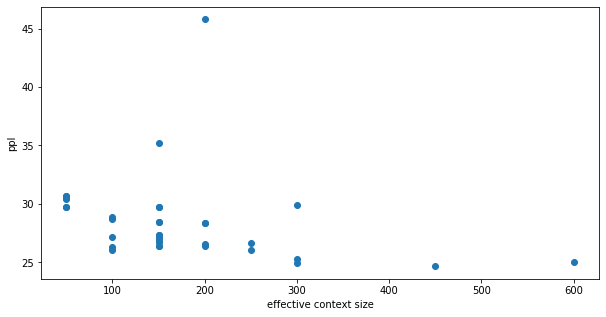

In [22]:
df_ = mt_base
plt.figure(figsize=(10, 5))
plt.scatter(df_['effective context'], df_['test ppl'])

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.show()

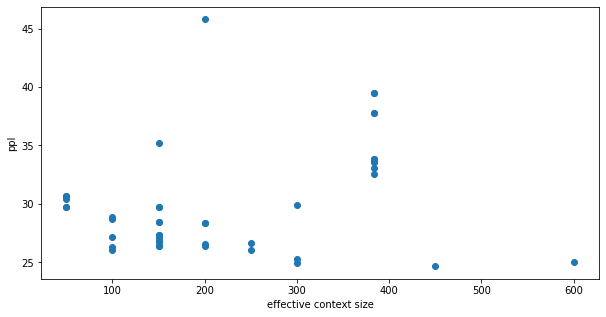

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(mt['effective context'], mt['test ppl'])

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.show()

In [92]:
# df_ = mt_base
# plt.figure(figsize=(16, 8))
# plt.title('Wt-103: base. Memory transformer')

# bpds = np.unique(df_.mem_backprop_depth)
# for bpd in bpds:
#     slice = df_[df_.mem_backprop_depth == bpd]

#     plt.scatter(slice['effective context'], slice['test ppl'])

# plt.xlabel('effective context size')
# plt.ylabel('ppl')
# plt.legend([f'bpd-{int(b)}' for b in bpds])
# plt.show()

In [87]:
# df_[[col for col in df_.columns if df_[col].unique().shape[0] > 1]]

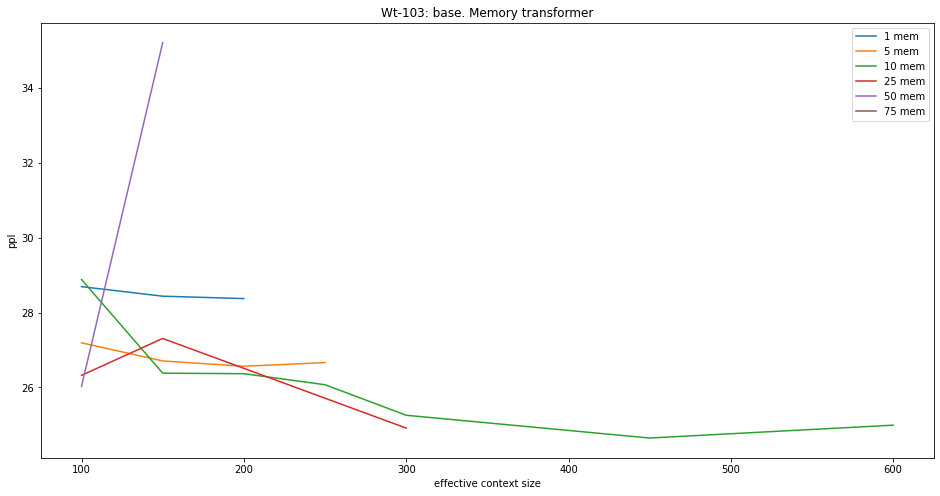

In [86]:
df_ = mt_base[(mt_base.mem_backprop_depth > 0)]
plt.figure(figsize=(16, 8))
plt.title('Wt-103: base. Memory transformer')

num_mems = np.unique(df_.num_mem_tokens)
for num_mem in num_mems:
    slice = df_[df_.num_mem_tokens == num_mem].sort_values('effective context')
    # plt.plot(slice['effective context'], slice['test ppl'])
    slice.groupby('effective context').mean()['test ppl'].plot()

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.legend([f'{m} mem' for m in num_mems])
plt.show()

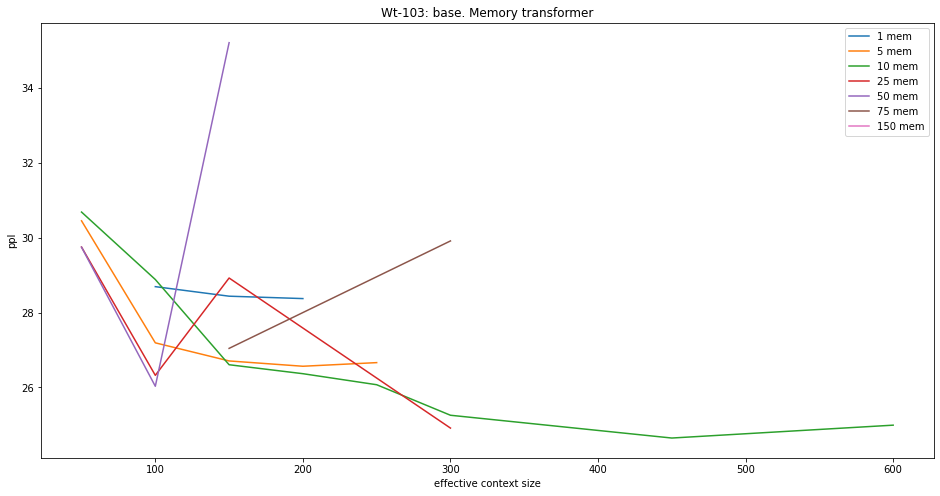

In [85]:
# df_ = mt_base[(mt_base.mem_backprop_depth > 0)]
df_ = mt_base#[mt_base.num_mem_tokens == 25]
plt.figure(figsize=(16, 8))
plt.title('Wt-103: base. Memory transformer')

num_mems = np.unique(df_.num_mem_tokens)
for num_mem in num_mems:
    slice = df_[df_.num_mem_tokens == num_mem].sort_values('effective context')
    # plt.plot(slice['effective context'], slice['test ppl'])
    slice.groupby('effective context').mean()['test ppl'].plot()

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.legend([f'{m} mem' for m in num_mems])
plt.show()

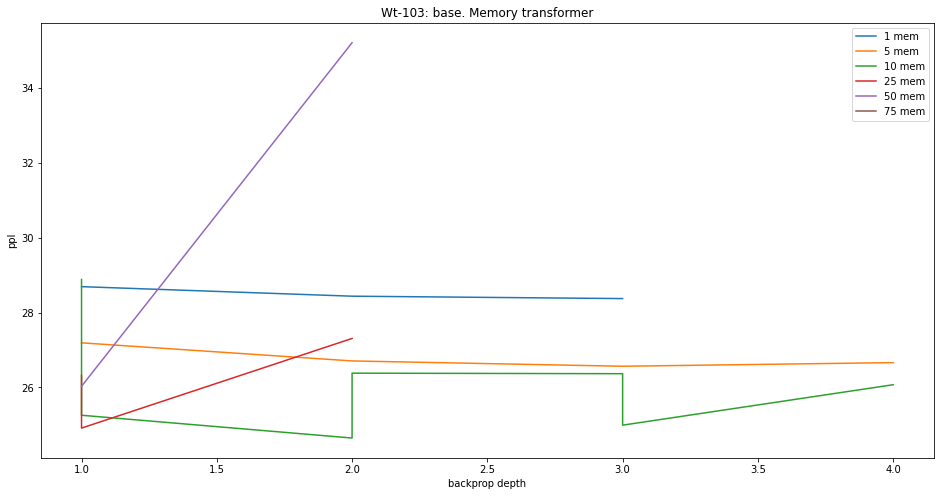

In [57]:
df_ = mt_base[mt_base.mem_backprop_depth > 0]
plt.figure(figsize=(16, 8))
plt.title('Wt-103: base. Memory transformer')

num_mems = np.unique(df_.num_mem_tokens)
for num_mem in num_mems:
    slice = df_[df_.num_mem_tokens == num_mem].sort_values('mem_backprop_depth')
    plt.plot(slice.mem_backprop_depth, slice['test ppl'])

    # plt.scatter(slice['effective context'], )

plt.xlabel('backprop depth')
plt.ylabel('ppl')
plt.legend([f'{m} mem' for m in num_mems])
plt.show()

In [ ]:
df_ = mt_base
plt.figure(figsize=(16, 8))
plt.title('Wt-103: base')

bpds = np.unique(df_.mem_backprop_depth)
for bpd in bpds:
    slice = df_[df_.mem_backprop_depth == bpd]

    plt.scatter(slice['effective context'], slice['test ppl'])

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.legend([f'bpd-{int(b)}' for b in bpds])
plt.show()

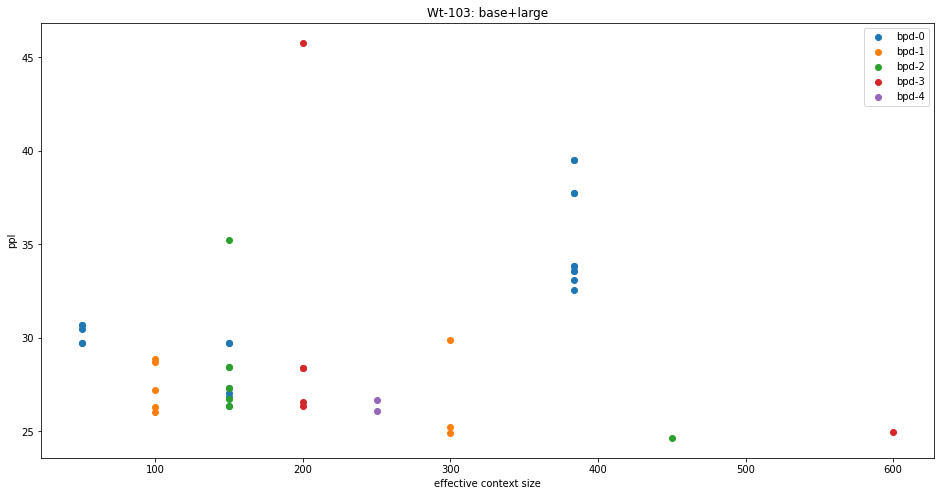

In [28]:
df_ = mt
plt.figure(figsize=(16, 8))
plt.title('Wt-103: base+large')

bpds = np.unique(df_.mem_backprop_depth)
for bpd in bpds:
    slice = df_[df_.mem_backprop_depth == bpd]

    plt.scatter(slice['effective context'], slice['test ppl'])

plt.xlabel('effective context size')
plt.ylabel('ppl')
plt.legend([f'bpd-{int(b)}' for b in bpds])
plt.show()